In [20]:
import itertools
import json
import numpy as np
import os
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
from tqdm import tqdm

from lol_rules import WARD_TYPES

In [21]:
data_folder = 'D:/fantasyai/data'
macro_folder = os.path.join(data_folder, 'macro_dataset')

MAP_SPLIT_N = 20
MAP_SIZE = 15000

Check target values

In [6]:
targets = defaultdict(lambda: [])
for filename in tqdm(os.listdir(macro_folder)):
    with open(os.path.join(macro_folder, filename), 'r') as f:
        for line in f:
            timestep_data = json.loads(line)
            for key, value in timestep_data.items():
                if 'target' in key:
                    targets[key].append(value)

for key in list(targets.keys()):
    targets[key] = np.array(targets.pop(key))

100%|██████████| 658/658 [04:38<00:00,  2.36it/s]


target_position 0.0 399.0


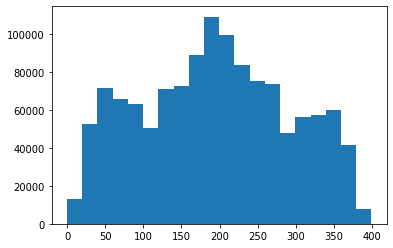

target_minions 0.0 18.822


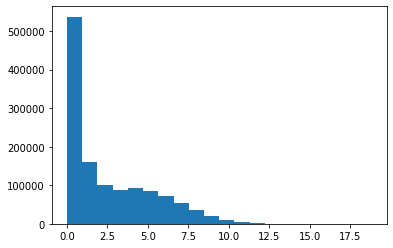

target_monsters 0.0 14.07320351409912


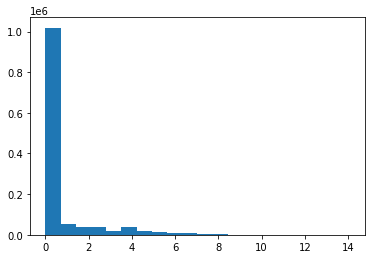

target_kills 0.0 5.0


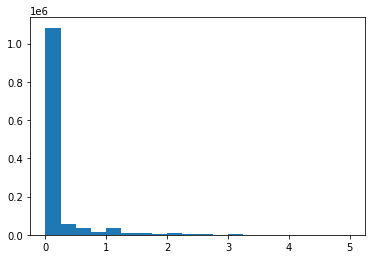

target_turrets 0.0 3.533


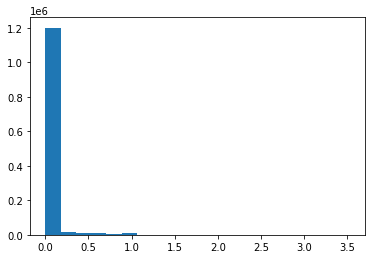

target_inhibitors 0.0 2.19


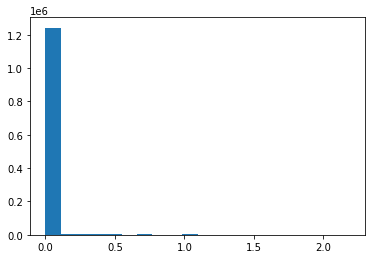

target_heralds 0.0 1.0


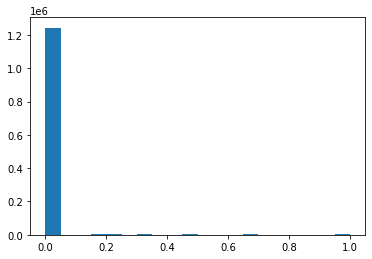

target_dragons 0.0 1.0


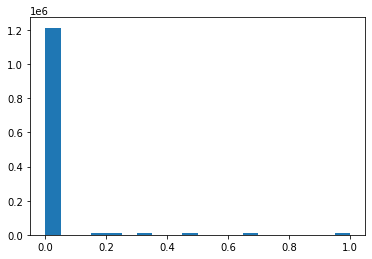

target_barons 0.0 1.0


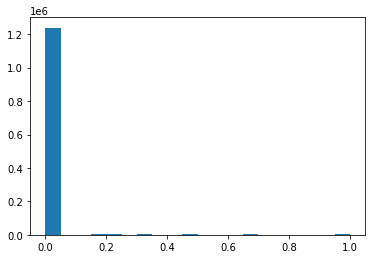

In [7]:
for key, value in targets.items():
    print(f"{key} {value.min()} {value.max()}")
    plt.hist(value.flatten(), bins=20)
    plt.show()

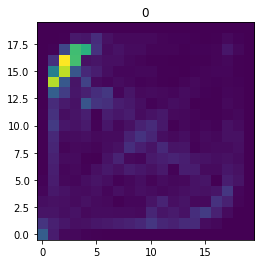

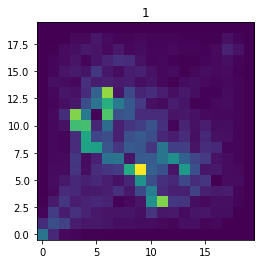

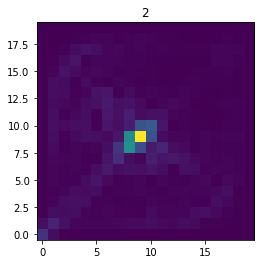

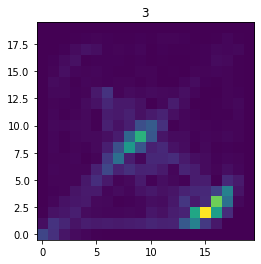

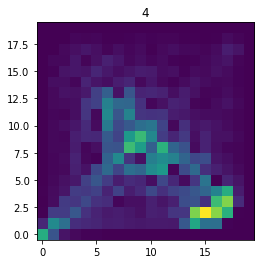

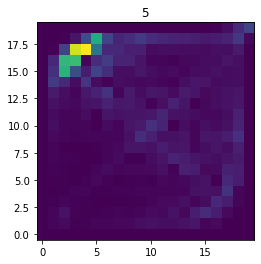

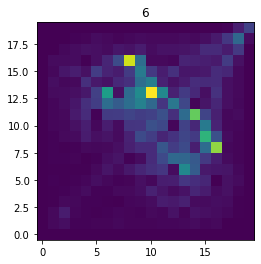

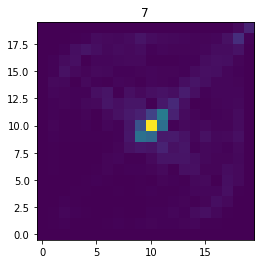

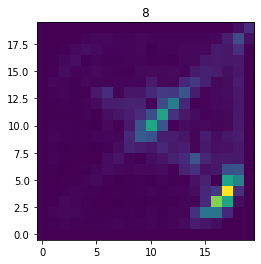

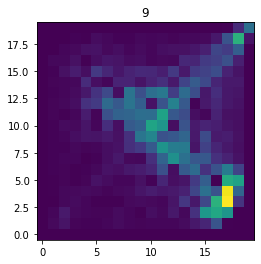

In [9]:
for champion in range(10):
    positions_2d = np.eye(MAP_SPLIT_N * MAP_SPLIT_N)[targets['target_position'][:, champion].astype(int)].reshape(-1, MAP_SPLIT_N, MAP_SPLIT_N)
    plt.title(champion)
    plt.imshow(positions_2d.mean(axis=0), origin='lower')
    plt.show()

Check feature values

In [22]:
features = defaultdict(lambda: [])
samples = 100
added_features = ('map',)
for filename in tqdm(itertools.islice(os.listdir(macro_folder), samples)):
    with open(os.path.join(macro_folder, filename), 'r') as f:
        for line in f:
            timestep_data = json.loads(line)
            for feature in added_features:
                features[feature].append(timestep_data[feature])

for feature in list(features.keys()):
    features[feature] = np.array(features.pop(feature))

100it [01:02,  1.61it/s]


In [23]:
print(features.keys())

dict_keys(['map'])


0 champions 0.0 5.0
Counter({0.0: 7560587, 1.0: 79662, 2.0: 6321, 3.0: 856, 4.0: 147, 5.0: 27})


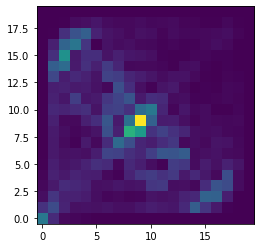

1 turrets 0.0 1.0
Counter({0.0: 7465396, 1.0: 182204})


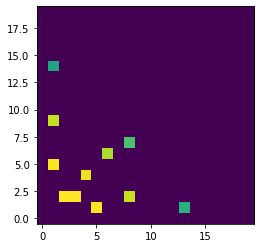

2 inhibitors 0.0 1.0
Counter({0.0: 7591061, 1.0: 56539})


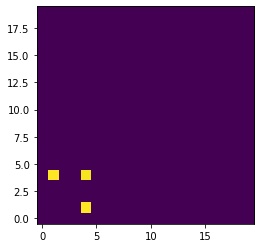

3 control 0.0 2.0
Counter({0.0: 7609811, 1.0: 37678, 2.0: 111})


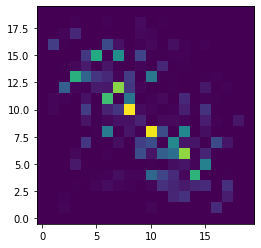

4 sight 0.0 3.0
Counter({0.0: 7603493, 1.0: 43890, 2.0: 204, 3.0: 13})


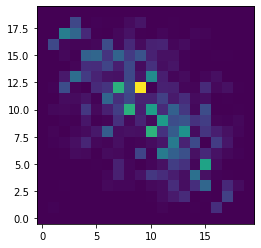

5 farsight 0.0 4.0
Counter({0.0: 7630015, 1.0: 17353, 3.0: 129, 2.0: 71, 4.0: 32})


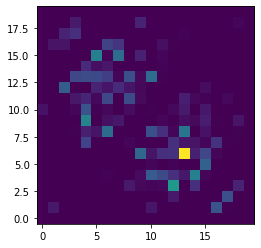

6 champions 0.0 5.0
Counter({0.0: 7561073, 1.0: 78822, 2.0: 6575, 3.0: 923, 4.0: 181, 5.0: 26})


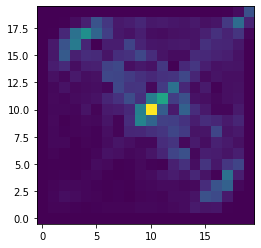

7 turrets 0.0 1.0
Counter({0.0: 7470666, 1.0: 176934})


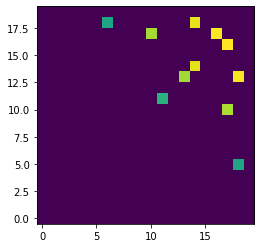

8 inhibitors 0.0 1.0
Counter({0.0: 7591479, 1.0: 56121})


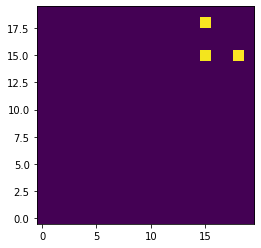

9 control 0.0 2.0
Counter({0.0: 7611278, 1.0: 36196, 2.0: 126})


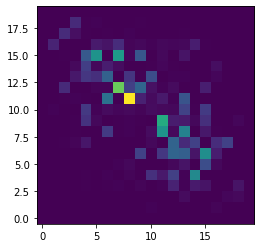

10 sight 0.0 3.0
Counter({0.0: 7603380, 1.0: 44021, 2.0: 176, 3.0: 23})


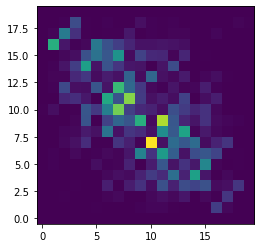

11 farsight 0.0 3.0
Counter({0.0: 7630057, 1.0: 17442, 2.0: 71, 3.0: 30})


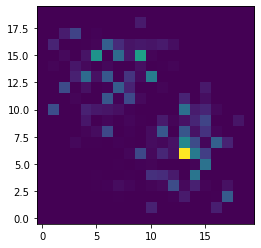

In [24]:
channels = ['champions', 'turrets', 'inhibitors'] + WARD_TYPES
for channel in range(12):
    value = features['map'][:, channel, :, :]
    print(channel, channels[channel % 6], value.min(), value.max())
    print(Counter(value.flatten()))
    mean_value = value.mean(axis=0)
    # print(Counter(mean_value.flatten()))
    plt.imshow(mean_value, origin='lower')
    plt.show()